In [37]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
import os

###keras is the simplified version of tensorflow. it needs two lines of code to build a neural network.
To load a dataset.......

the grayscale is basically black and white so it needs two layers but if the data sets contains things which are colored as in rgb so it needs three layers

In [2]:
mnist = keras.datasets.mnist
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

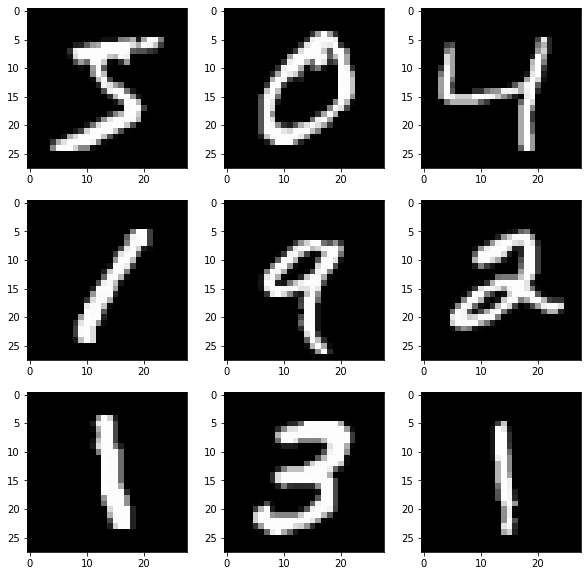

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(x_train_full[a], cmap = plt.get_cmap('gray'))
        a = a + 1
    
plt.show()    

As you can see in the matrix that the values are very high from 0 to 255. which will be very difficult for the machine to identify. therefore we will divide our dataset to 255 to do the normalization

we will have the validation data set 

In [7]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[:5000]
y_valid, y_train = y_train_full[:5000]/255, y_train_full[:5000]
x_test = x_test/255

In [8]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
class_names = ["0","1","2","3","4","5","6", "7","8","9"]

In [21]:
class_names[y_train[4]]

'9'

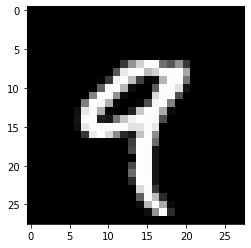

In [25]:
plt.imshow(x_train[4], cmap = plt.get_cmap('gray'))

making a model and adding layers to it.

We have different methods to create a model. but in keras we have sequential model which is very simple model

we are using softmax in our output layer instead of sigmoid because all the images are different from each other and they donot have probability. 

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.layers

Now you can see that trainable parameters are above. They can be trained. Now you have to compile the model. Hyper parameter are the things which we set ourselfs beforehand. this basically hard code.They can not be learned.

To compile the model you should choose the loss and optimizer related to the problem you are dealing with.

#https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function

the last one is the metric which allows your model to report on other than loss. for example if you add accuracy in the metric so it will calculate accuracy other than loss.

In [36]:
model.compile(loss ="sparse_categorical_crossentropy" , optimizer = "sgd", metrics = ["accuracy"])

In the Keras library for deep learning, the compile method is used to configure the learning process of a model. When you compile a model in Keras, you specify the optimizer that you want to use to train the model, the loss function that you want to use to evaluate the model's performance, and any metrics that you want to use to monitor the model's performance during training.

The optimizer is responsible for updating the model's weights based on the loss function and the input data. The loss function is used to evaluate the model's performance on the training data and to compute the gradient of the model's weights with respect to the loss. The metrics are used to monitor the model's performance during training and to evaluate the model's performance on the validation and test data.

Compiling a model in Keras allows you to specify these important components of the learning process, which are necessary for training and evaluating the model. It also allows you to fine-tune the model's behavior by specifying hyperparameters such as the learning rate and momentum for the optimizer, or the weight decay for regularization.

In [43]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 16)

Epoch 1/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3463 - val_accuracy: 0.0000e+00
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3458 - val_accuracy: 0.0000e+00
Epoch 3/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3459 - val_accuracy: 0.0000e+00
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3461 - val_accuracy: 0.0000e+00
Epoch 5/30
313/313 [==============================] - 3s 8ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3443 - val_accuracy: 0.0000e+00
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3454 - val_accuracy: 0.0000e+00
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1126 - val_loss: 2.3458 - val

In [42]:
x_train.shape

(5000, 28, 28)

batch size is basically the 32 examples. As 5000/32 = 157 so we have 157 chunks

we can also change batch size to 16 as 5000/16 =313

then we can plot our model accuracy and loss

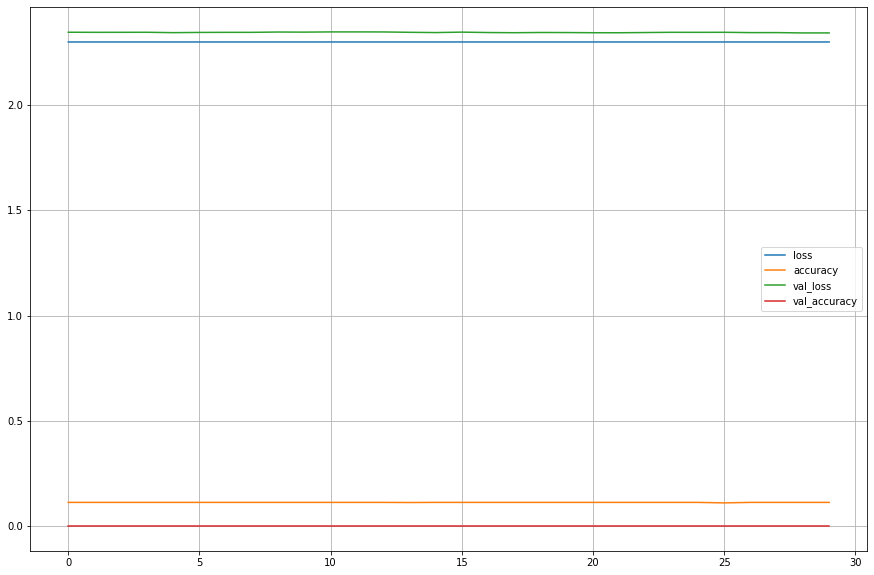

In [48]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()


In [49]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3020 - accuracy: 0.1135


[2.3019678592681885, 0.11349999904632568]

In [50]:
y_prob = model.predict(x_test)
y_classes = y_prob.argmax(axis=1)
y_classes

313/313 [==============================] - 1s 2ms/step


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

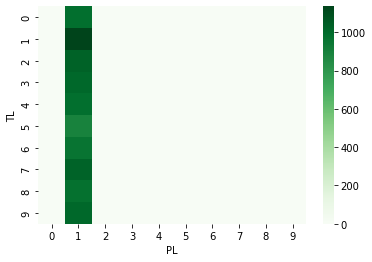

In [55]:
import seaborn as sns

fig = sns.heatmap(confusion_matrix, cmap = 'Greens')
fig.set_xlabel('PL')
fig.set_ylabel('TL')
plt.show()
